<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/ProjectML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC




In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for KNN (flatten images)
x_train_knn = x_train.reshape(-1, 32 * 32 * 3)
x_test_knn = x_test.reshape(-1, 32 * 32 * 3)

In [ ]:
# Define Random Forest model (baseline)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for 10 classes



In [ ]:
# Define Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
# Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train Random Forest model
rf.fit(x_train.reshape(-1, 32 * 32 * 3), y_train.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Train KNN model
knn.fit(x_train_knn, y_train.ravel())

KNeighborsClassifier()

In [ ]:
# Train CNN model with early stopping
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4803 - accuracy: 0.4651 - val_loss: 1.2553 - val_accuracy: 0.5548
Epoch 2/50
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1298 - accuracy: 0.6014 - val_loss: 1.0507 - val_accuracy: 0.6379
Epoch 3/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9949 - accuracy: 0.6538 - val_loss: 0.9890 - val_accuracy: 0.6584
Epoch 4/50
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9074 - accuracy: 0.6859 - val_loss: 0.9333 - val_accuracy: 0.6819
Epoch 5/50
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8431 - accuracy: 0.7053 - val_loss: 0.9336 - val_accuracy: 0.6860
Epoch 6/50
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7864 - accuracy: 0.7275 - val_loss: 0.9212 - val_accuracy: 0.6842
Epoch 7/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7384 - accuracy: 0.7420 - val_loss: 0.8972 -

KeyboardInterrupt: 

In [ ]:
# Train Gradient Boosting model
gb.fit(x_train.reshape(-1, 32 * 32 * 3), y_train.ravel())  # Reshape for Gradient Boosting

NameError: name 'gb' is not defined

In [ ]:
# Evaluate Random Forest model
rf_pred = rf.predict(x_test.reshape(-1, 32 * 32 * 3))
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [ ]:
# Evaluate KNN model
knn_pred = knn.predict(x_test_knn)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

In [ ]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)
cnn_pred = np.argmax(model.predict(x_test), axis=-1)
cnn_precision = precision_score(y_test, cnn_pred, average='macro')
cnn_recall = recall_score(y_test, cnn_pred, average='macro')
cnn_f1 = f1_score(y_test, cnn_pred, average='macro')

313/313 [==============================] - 4s 12ms/step


In [ ]:
# Evaluate Gradient Boosting model
gb_pred = gb.predict(x_test.reshape(-1, 32 * 32 * 3))  # Reshape for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='macro')
gb_recall = recall_score(y_test, gb_pred, average='macro')
gb_f1 = f1_score(y_test, gb_pred, average='macro')


Random Forest Model:
Accuracy: 0.4654
Precision (Macro): 0.4610167392895054
Recall (Macro): 0.4654
F1-Score (Macro): 0.4620635444371267


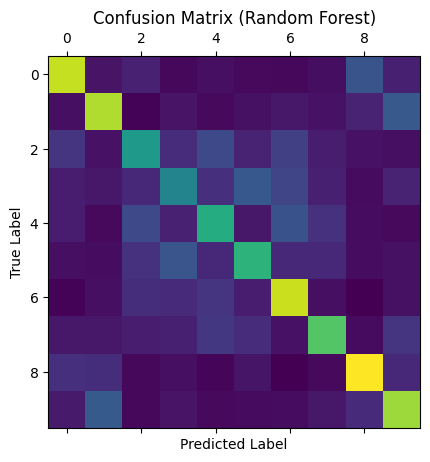


KNN Model:
Accuracy: 0.3398
Precision (Macro): 0.43042618255284965
Recall (Macro): 0.3398
F1-Score (Macro): 0.3260170986061005


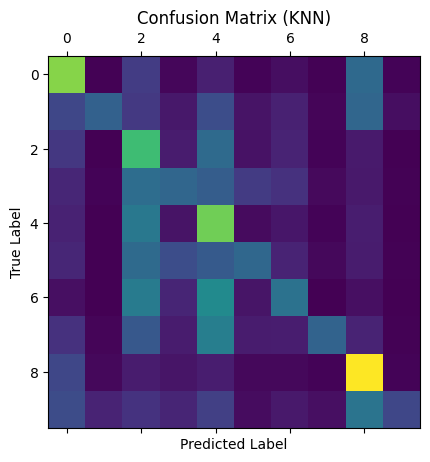


CNN Model:
Test Loss: 0.9501876831054688
Test Accuracy: 0.7006000280380249
Precision (Macro): 0.6982808075542284
Recall (Macro): 0.7005999999999999
F1-Score (Macro): 0.6938143187940569


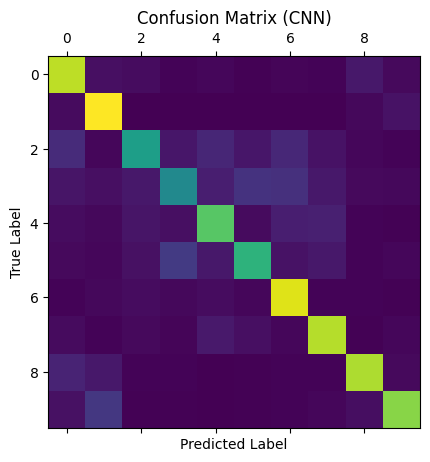

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  """
  Plots the Confusion Matrix for a given model.

  Args:
      y_true: Ground truth labels (array-like).
      y_pred: Predicted labels (array-like).
      model_name: Name of the model (string).
  """
  cm = tf.math.confusion_matrix(y_true, y_pred)

  plt.matshow(cm)
  plt.title(f'Confusion Matrix ({model_name})')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Print evaluation results
print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision (Macro):", rf_precision)
print("Recall (Macro):", rf_recall)
print("F1-Score (Macro):", rf_f1)

# Visualize Random Forest Confusion Matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

print("\nKNN Model:")
print("Accuracy:", knn_accuracy)
print("Precision (Macro):", knn_precision)
print("Recall (Macro):", knn_recall)
print("F1-Score (Macro):", knn_f1)

# Visualize KNN Confusion Matrix
plot_confusion_matrix(y_test, knn_pred, "KNN")

print("\nCNN Model:")
print("Test Loss:", cnn_loss)
print("Test Accuracy:", cnn_accuracy)
print("Precision (Macro):", cnn_precision)
print("Recall (Macro):", cnn_recall)
print("F1-Score (Macro):", cnn_f1)

# Visualize CNN Confusion Matrix
plot_confusion_matrix(y_test, cnn_pred, "CNN")

print("\nGradient Boosting Model:")
print("Accuracy:", gb_accuracy)
print("Precision (Macro):", gb_precision)
print("Recall (Macro):", gb_recall)
print("F1-Score (Macro):", gb_f1)


# Visualize SVM Confusion Matrix
plot_confusion_matrix(y_test, gb_pred, "GB")